In [10]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
from datetime import datetime
import json

import matplotlib.pyplot as plt
import numpy as np


def getMatchDic(match_id):
    req = Request(
        "https://api.opendota.com/api/matches/{}".format(match_id),
        headers={"User-Agent": "Mozilla/5.0"},
    )
    page_html = urlopen(req).read()
    page_soup = soup(page_html, "html.parser")
    return json.loads(str(page_soup))

def getRadiantGoldAdvantage(match_dic):
    return np.array(match_dic["radiant_gold_adv"])

In [11]:
dic = getMatchDic(6227105229) #6227105229 6227492909 6227305557
adv = getRadiantGoldAdvantage(dic)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


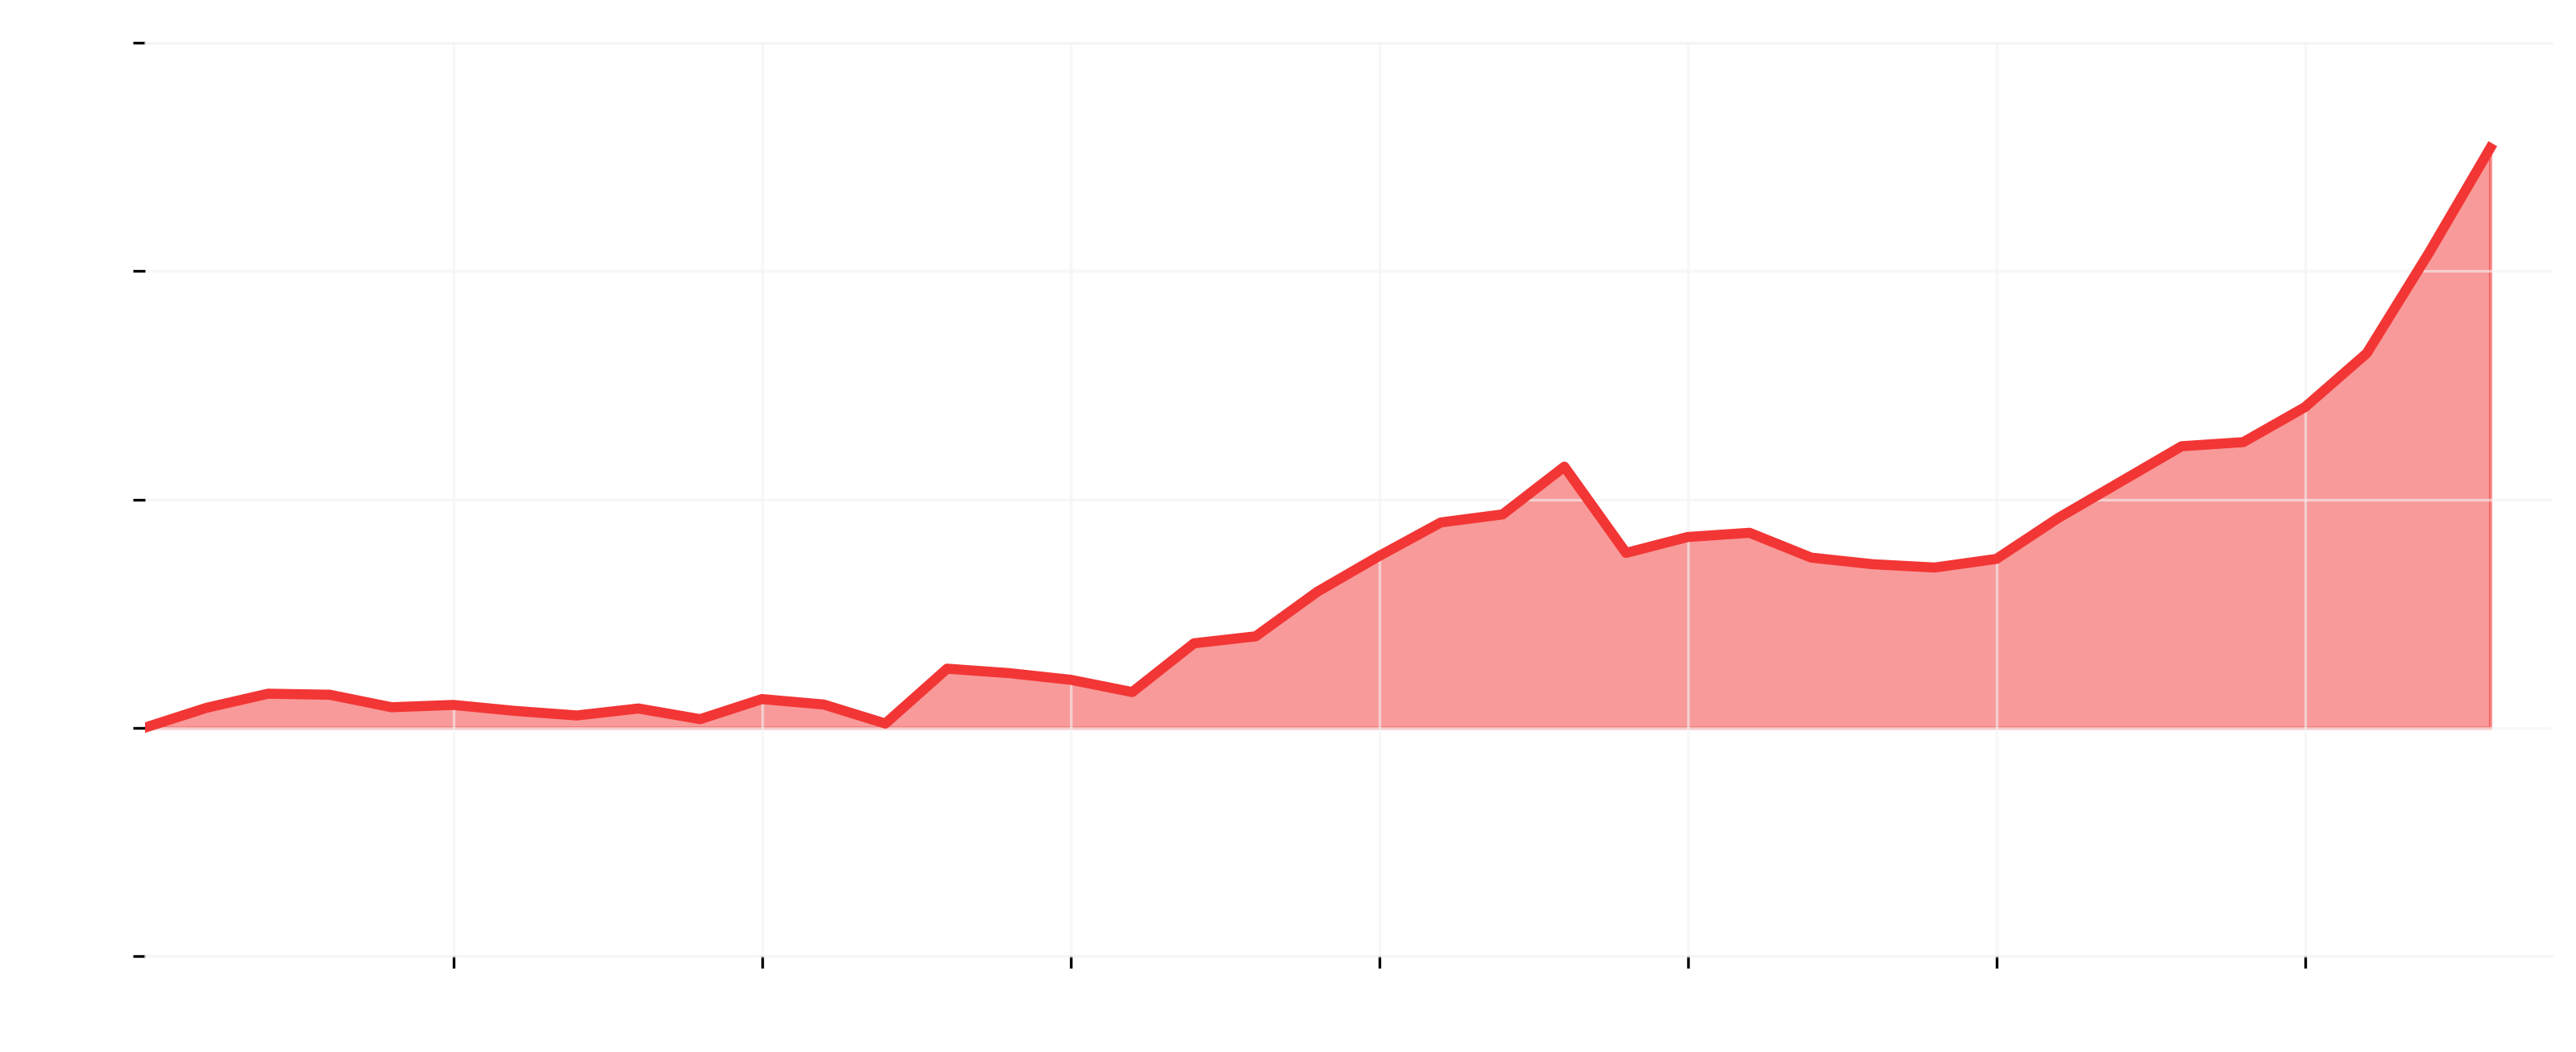

In [17]:
def linear_interpolate_y_cross_zero(x, values):
    when_y_cross_zero = []
    for i in range(len(values)-1):
        if (values[i] < 0 and values[i+1] > 0) or (values[i] > 0 and values[i+1] < 0):
            temp_i = abs(values[i]) / (abs(values[i]) + abs(values[i+1]))
            when_y_cross_zero.append(x[i] + temp_i)

    x, y = np.append(x, when_y_cross_zero), np.append(values, np.zeros((len(when_y_cross_zero,))))
    sorted_together = sorted([(v1, v2) for v1, v2 in zip(x, y)], key = lambda x: x[0])
    x = np.array([elem[0] for elem in sorted_together])
    y = np.array([elem[1] for elem in sorted_together])

    return x, y

def plotAdv(adv, path):
    temp_adv = adv
    size = 5
    fig, ax = plt.subplots(1, 1, figsize=(2.57 * size, size), dpi = 300)
    x = np.arange(len(adv))
    x, adv = linear_interpolate_y_cross_zero(x, adv)
    adv1, adv2 = np.where(adv >= 0, adv, np.nan), np.where(adv <= 0, adv, np.nan)
    ax.plot(x, adv1, color = "#F23635", linewidth = 3)
    ax.plot(x, adv2, color = "#F2F2F2", linewidth = 3)
    ax.fill_between(x, 0, adv, where=adv>=0, color = "#F23635", alpha = 0.5)
    ax.fill_between(x, 0, adv, where=adv<=0, color = "#F2F2F2", alpha = 0.5)
    ax.grid(color = "#F2F2F2", alpha = 0.6)

    ax.set_xticks((np.arange(np.floor(len(temp_adv)/5)) + 1)*5)
    label_x = [str(int(elem)) + ":00" for elem in (np.arange(np.floor(len(temp_adv)/5)) + 1)*5]
    label_x[0] = "0" + label_x[0]
    ax.set_xticklabels(label_x, fontsize = 15, fontname = "Helvetica")
    ax.set_xlim(0, len(temp_adv))

    step_size = 5000
    satisfied = False
    while not satisfied:
        temp_range = abs(np.floor(min(adv)/step_size)) + np.ceil(max(adv)/step_size)
        if temp_range > 5:
            step_size = 2*step_size
        else:
            satisfied = True
    min_y, max_y = np.floor(min(adv)/step_size)*step_size, np.ceil(max(adv)/step_size)*step_size
    min_y, max_y = min(min_y, -step_size), max(max_y, step_size)
    ax.set_ylim(min_y, max_y)
    ax.set_yticks(np.arange((max_y - min_y)/step_size+1)*step_size+min_y)
    ax.set_yticklabels([str(int(elem/1000)) + "K" for elem in np.arange((max_y - min_y)/step_size+1)*step_size+min_y], fontsize = 15)

    ax.spines["bottom"].set_color("#F2F2F2")
    ax.spines["bottom"].set_alpha(0.6)
    ax.spines["top"].set_color("#F2F2F2")
    ax.spines["top"].set_alpha(0.6)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)

    [t.set_color("#FFFFFF") for t in ax.xaxis.get_ticklabels()]
    [t.set_color("#FFFFFF") for t in ax.yaxis.get_ticklabels()]
    
    fig.savefig(path, transparent = True)

plotAdv(adv, "temp.png")